In [116]:
import numpy as np
import tensorflow as tf
import numba
import time
from timeit import default_timer as timer
from datetime import timedelta
from matplotlib import pyplot as plt

In [117]:
def timeit(func):
    def wrapper(*args, **kwargs):
        t = time.process_time()
        value = func(*args, **kwargs)
        elapsed_time = time.process_time() - t
        print("Elapsed time for func {f}: {s} s".format(f=func.__name__, s=round(elapsed_time,4)))
        return value
    return wrapper

def timeit2(func):
    def wrapper(*args, **kwargs):
        start = timer()
        value = func(*args,**kwargs)
        end = timer()
        t = timedelta(seconds=end-start)
        #print("Time elapsed for func {f}: {t} s".format(f=func.__name__,t=t))
        return (value, t.total_seconds() * 1000)
    return wrapper

In [118]:
a = np.array([[0.5, -1], [-1, -2]], dtype=np.float32)
assert a.shape == (2,2)
assert a.ndim == 2
b = a.copy().flatten()
b[1::2] = 0

In [156]:
@timeit2
def mydot(a, b):
    c = [[0 for j in range(len(b[i]))] for i in range(len(a))]

    for i in range(len(c)):
        for j in range(len(c[i])):
            t = 0
            for k in range(len(b)):
                t += a[i][k] * b[k][j]
            c[i][j] = t
    return c

@timeit2
@numba.jit(nopython=True)
def myfastdot(a,b):
    c = np.zeros( (len(a), len(b[0])))

    for i in range(len(c)):
        for j in range(len(c[i])):
            t = 0
            for k in range(len(b)):
                t += a[i][k] * b[k][j]
            c[i][j] = t
    return c
    

@timeit2
def numpydot(a,b):
    return np.dot(a,b)

In [157]:
Ns = np.array([5, 10, 25, 50, 100, 250, 500, 750])
my_y = []
numpy_y = []
numba_y = []
for N in Ns:
    a = np.random.rand(N,N)
    b = np.random.rand(N,N)
    my_y.append(mydot(a,b)[1])
    numba_y.append(myfastdot(a,b)[1])
    numpy_y.append(numpydot(a,b)[1])

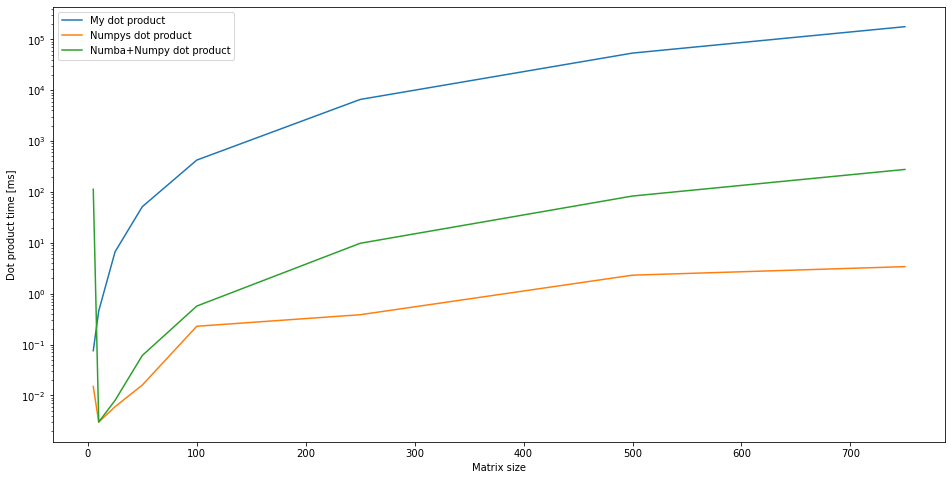

In [158]:
fig, ax = plt.subplots(figsize=(16,8))
plt.xlabel("Matrix size")
plt.ylabel("Dot product time [ms]")
plt.yscale("log")
plt.plot(Ns, my_y, label="My dot product")
plt.plot(Ns, numpy_y, label="Numpys dot product")
plt.plot(Ns, numba_y, label="Numba+Numpy dot product")
plt.legend()
plt.show()